In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
%matplotlib inline

#### First, let's download the dataset and look at the data. ####
**Features description:**

- **crim** - per capita crime rate by town.

- **zn** - proportion of residential land zoned for lots over 25,000 sq.ft.

- **indus** - proportion of non-retail business acres per town.

- **chas** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

- **nox** - nitrogen oxides concentration (parts per 10 million).

- **rm** - average number of rooms per dwelling.

- **age** - proportion of owner-occupied units built prior to 1940.

- **dis** - weighted mean of distances to five Boston employment centres.

- **rad** - index of accessibility to radial highways.

- **tax** - full-value property-tax rate per \$10,000.

- **ptratio** - pupil-teacher ratio by town.

- **b** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- **lstat** - lower status of the population (percent).

- **medv** - median value of owner-occupied homes in \$1000s (**target feature**).

In [2]:
houses = pd.read_csv("../data/BostonHousing.csv")

houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
houses.shape

(506, 14)

In [4]:
houses.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
houses.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

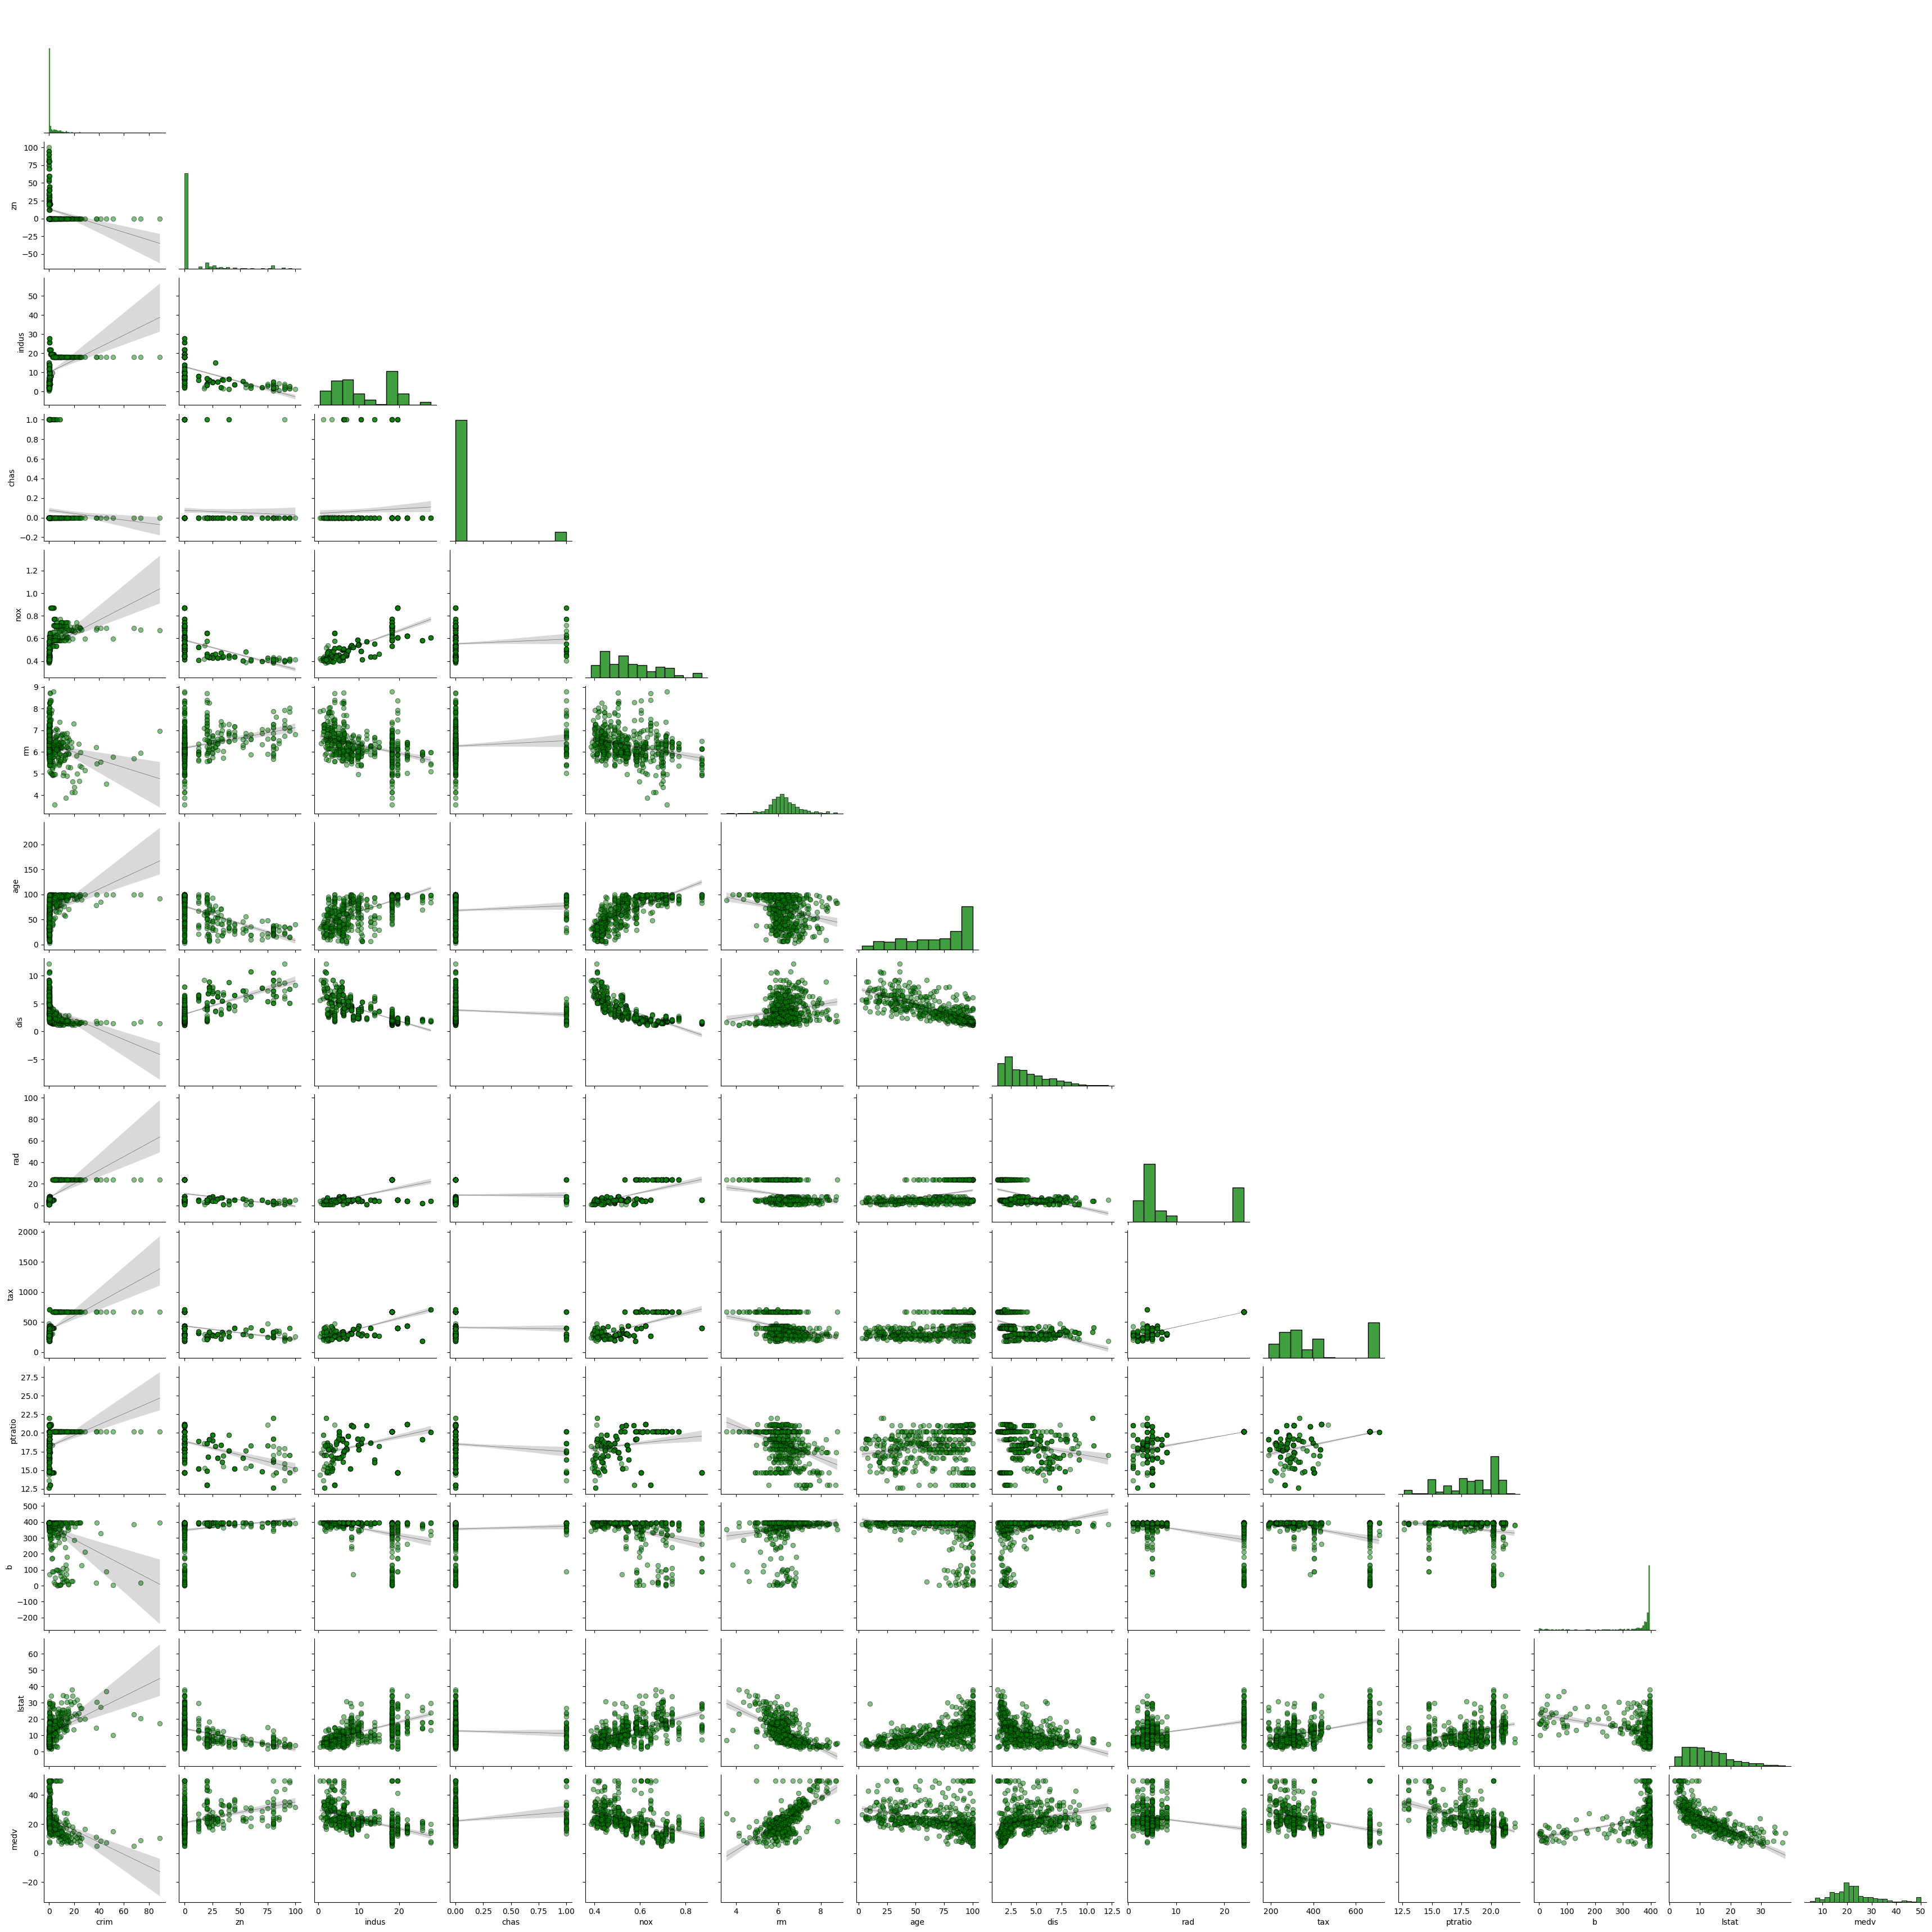

In [34]:
sns.pairplot(houses, kind='reg', corner=True, diag_kws={'color':'green'}, plot_kws={'color':'green', 
             'scatter_kws': {'edgecolors': 'black', 'linewidths': 0.7, 'alpha': 0.5}, 
             'line_kws': {'color': 'black', 'linewidth': 0.5, 'linestyle': '--'}});

''

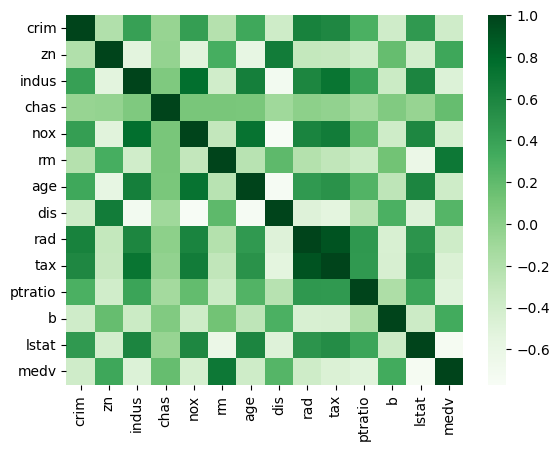

In [7]:
sns.heatmap(houses.corr(), cmap='Greens')
;

''

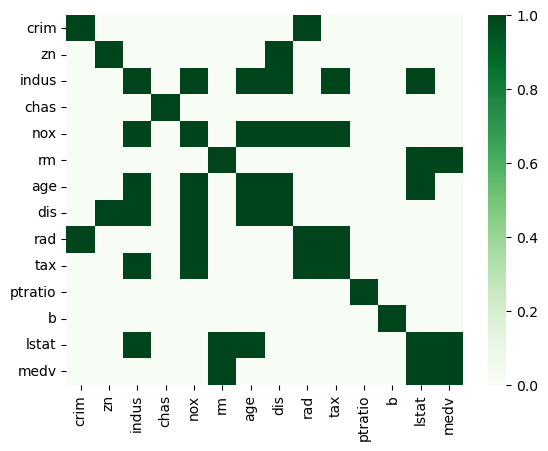

In [8]:
sns.heatmap(houses.corr().abs() > 0.6, cmap='Greens')
;

There are no NAs in the dataset to deal with. Some features correlate with each other.

We need to split the dataset to the target and features, where target is **medv** and standardize the features.

In [9]:
features, target = houses[houses.columns[:-1]], houses[houses.columns[-1]]

features.shape[0] == target.shape[0]

True

#### Standardization of the features. ####

In [10]:
means = features.mean(axis=0)
stds = features.std(axis=0)

scaled_features = (features - means) / stds

scaled_features.describe().round(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.419,-0.487,-1.556,-0.272,-1.464,-3.876,-2.333,-1.266,-0.982,-1.313,-2.705,-3.903,-1.530
25%,-0.411,-0.487,-0.867,-0.272,-0.912,-0.568,-0.837,-0.805,-0.637,-0.767,-0.488,0.205,-0.799
50%,-0.390,-0.487,-0.211,-0.272,-0.144,-0.108,0.317,-0.279,-0.522,-0.464,0.275,0.381,-0.181
75%,0.007,0.049,1.015,-0.272,0.598,0.482,0.906,0.662,1.660,1.529,0.806,0.433,0.602
max,9.924,3.800,2.420,3.665,2.730,3.552,1.116,3.957,1.660,1.796,1.637,0.441,3.545


#### Full model. ####

In [11]:
X = sm.add_constant(scaled_features)
model_scaled = sm.OLS(target, X)
results_scaled = model_scaled.fit()

print(results_scaled.summary())
     

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        19:09:07   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

Let's predict the target values according to our full linear model.

In [12]:
prediction_result = results_scaled.get_prediction(X)
target_pred = prediction_result.predicted_mean
slope, intercept = np.polyfit(target_pred, target, 1)

#### Model diagnosis. Linearity. ####

We will take a look at the linearity of the predicted target values and real target values.

/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

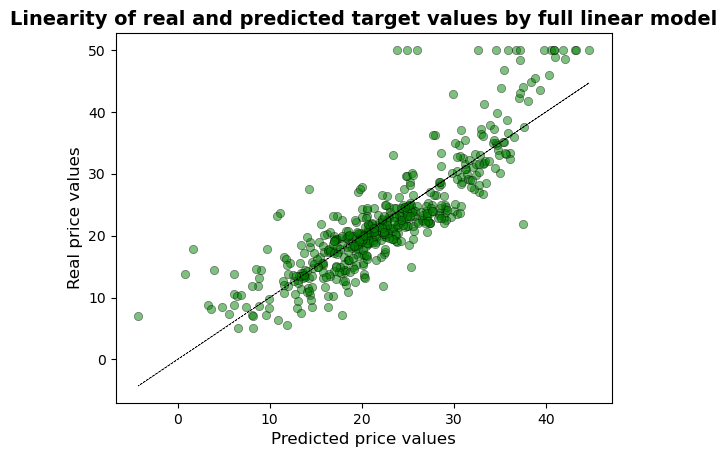

In [48]:
sns.scatterplot(target_pred, target, color='green', edgecolor='black', alpha=0.5)
plt.title('Linearity of real and predicted target values by full linear model', size=14, weight='bold')
plt.xlabel('Predicted price values', size=12)
plt.ylabel('Real price values', size=12)
plt.plot(target_pred, slope * target_pred + intercept, linewidth=0.5, color='black', linestyle='--')
;

#### Model diagnosis. Influential observations check. ####

To check whether there are some influential observations we will use Cook's distances. There are no influential observations that could possibly not fit in our model.

In [14]:
influence = results_scaled.get_influence()
cooks = influence.cooks_distance
(cooks[1] < 0.05).sum()

0

#### Model diagnosis. Independence of observations. ####

For dependent observations identification we will need some additional information that we don't have such as houses from the same neighbourhood built from the same developer. As far as we don't have any features disclosing such information we can not make any assumptions about observations independence.

#### Model diagnosis. Distribution normality and homoscedasticity. ####

Model evaluation using residuals. Density plot, qq-plot and residuals vs fits plots are used. All plots show the residuals do not have neither normal distribution nor homoscedasticity. It is supported by D’Agostino and Pearson’s test.

In [15]:
residuals = target - target_pred

''

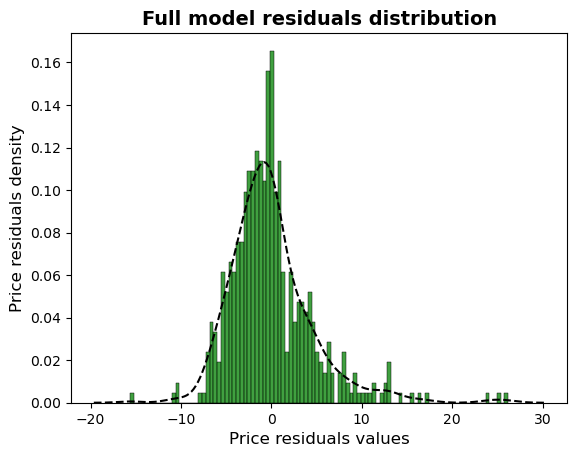

In [16]:
sns.histplot(residuals, bins=100, stat='density', color='green')
sns.kdeplot(residuals, color='black', linestyle='--')
plt.title('Full model residuals distribution', size=14, weight='bold')
plt.ylabel('Price residuals density', size=12)
plt.xlabel('Price residuals values', size=12)
;

''

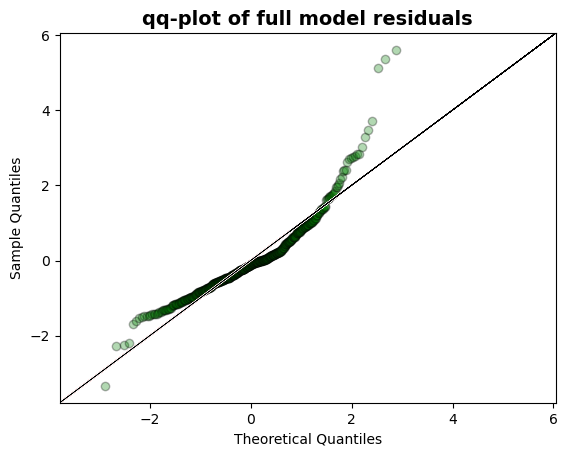

In [17]:
sm.qqplot(residuals, line='45', fit=True, markerfacecolor='green', markeredgecolor='black', alpha=0.3)
plt.plot(target_pred, slope * target_pred + intercept, color='white')
plt.plot(target_pred, slope * target_pred + intercept, color='black', linewidth=0.5)
plt.title('qq-plot of full model residuals', size=14, weight='bold')
;

/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

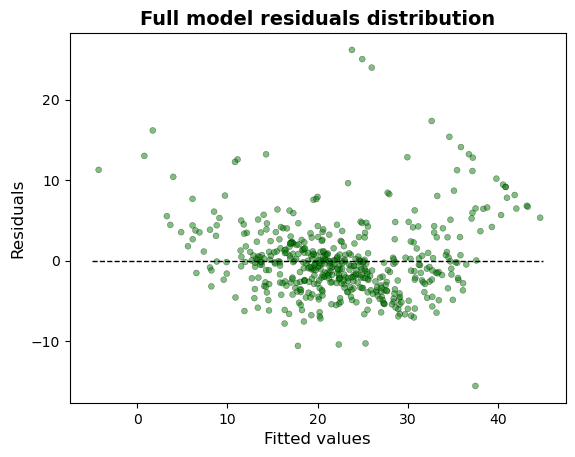

In [49]:
sns.scatterplot(target_pred, residuals, color='green', edgecolor='black', alpha=0.5, size=3, legend=False)
plt.title('Full model residuals distribution', size=14, weight='bold')
plt.ylabel('Residuals', size=12)
plt.xlabel('Fitted values', size=12)
plt.hlines(0, -5, 45, color='black', linewidth=1, linestyle='--')
;

In [19]:
print('Null hypothesis: residuals variable comes from a normal distribution')
k, p = stats.normaltest(residuals)
alpha = 0.05
print("p = {:g}".format(p))
p = 8.4713e-19
if p < alpha:
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

Null hypothesis: residuals variable comes from a normal distribution
p = 2.18204e-39
The null hypothesis can be rejected


/usr/lib/python3/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

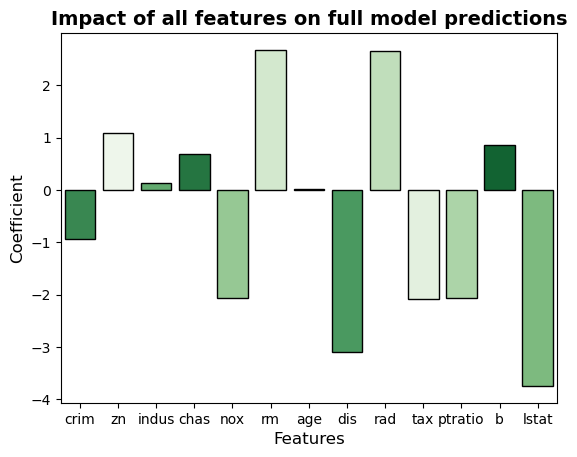

In [53]:
params = results_scaled.params.drop('const')
coefficients = results_scaled.params.index.drop('const')
pal = sns.color_palette("Greens", len(coefficients))
rank = results_scaled.params.index.drop('const').argsort().argsort()
sns.barplot(coefficients, params, palette=np.array(pal[::-1])[rank], edgecolor='black')
plt.xticks()
plt.title('Impact of all features on full model predictions', size=14, weight='bold')
plt.ylabel('Coefficient', size=12)
plt.xlabel('Features', size=12)
;

It is noticeable that the lstat variable has the biggest absolute coefficient, thus provides the most prediscting effect for our model.

Lstat variable is the percent of the lower status of population.

#### Model based only on lstat ####

Tagret and lstat do not have the linear relation. However, it could be noticed that log(stat) and target are lineary dependent.

In [21]:
houses_main_pred = pd.concat([target, features], axis=1).drop(houses.columns[:-2], axis=1)
houses_main_pred['lstat_log'] = np.log(houses_main_pred.lstat)

''

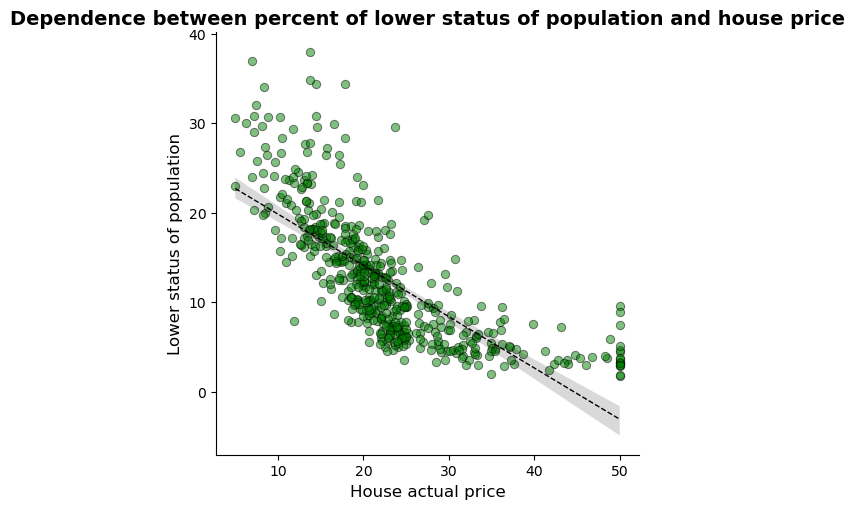

In [55]:
sns.lmplot(x="medv", y="lstat", data=houses_main_pred, 
           scatter_kws={'color': 'green', 'edgecolors': 'black', 'linewidths': 0.7, 'alpha': 0.5}, 
           line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1})
plt.title('Dependence between percent of lower status of population and house price', size=14, weight='bold')
plt.xlabel('House actual price', size=12)
plt.ylabel('Lower status of population', size=12)
;

''

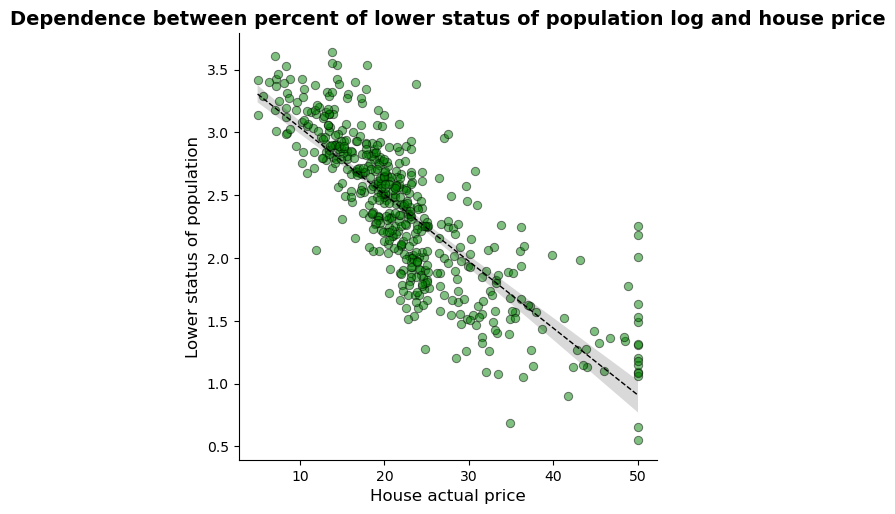

In [56]:
sns.lmplot(x="medv", y="lstat_log", data=houses_main_pred, 
           scatter_kws={'color': 'green', 'edgecolors': 'black', 'linewidths': 0.7, 'alpha': 0.5}, 
           line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1})
plt.title('Dependence between percent of lower status of population log and house price', size=14, weight='bold')
plt.xlabel('House actual price', size=12)
plt.ylabel('Lower status of population', size=12)
;

In [24]:
houses_main_pred = pd.concat([pd.Series(target_pred), houses_main_pred], axis=1) \
    .rename(columns={0: 'medv_pred'})

''

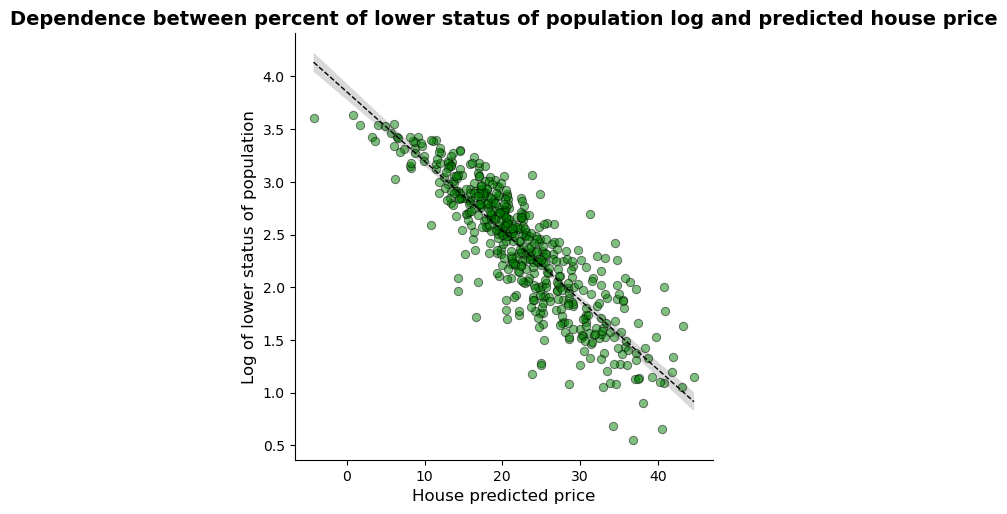

In [27]:
sns.lmplot(x="medv_pred", y="lstat_log", data=houses_main_pred, 
           scatter_kws={'color': 'green', 'edgecolors': 'black', 'linewidths': 0.7, 'alpha': 0.5}, line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 1})
plt.title('Dependence between percent of lower status of population log and predicted house price', size=14, weight='bold')
plt.xlabel('House predicted price', size=12)
plt.ylabel('Log of lower status of population', size=12)
;

#### The full model is not perfect because before fitting there was no linearity of target-feature check and the residuals are not distributed normally and are not homoscedastic ####

#### Facultative part ####

Full model on non-preprocessed data:

In [26]:
print(results_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          6.72e-135
Time:                        19:09:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.211    106.814      0.0

Data preprocessing. We will take a logarithm of lstat and use it for further model fitting, renormalize data and then fit the model again.

In [62]:
features['lstat_log'] = np.log(features.lstat)
features_processed = features.drop('lstat', axis=1)

means_proc = features_processed.mean(axis=0)
stds_proc = features_processed.std(axis=0)

scaled_features_proc = (features_processed - means_proc) / stds_proc

scaled_features_proc.describe().round(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat_log
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.419,-0.487,-1.556,-0.272,-1.464,-3.876,-2.333,-1.266,-0.982,-1.313,-2.705,-3.903,-3.034
25%,-0.411,-0.487,-0.867,-0.272,-0.912,-0.568,-0.837,-0.805,-0.637,-0.767,-0.488,0.205,-0.719
50%,-0.390,-0.487,-0.211,-0.272,-0.144,-0.108,0.317,-0.279,-0.522,-0.464,0.275,0.381,0.098
75%,0.007,0.049,1.015,-0.272,0.598,0.482,0.906,0.662,1.660,1.529,0.806,0.433,0.765
max,9.924,3.800,2.420,3.665,2.730,3.552,1.116,3.957,1.660,1.796,1.637,0.441,2.107


In [63]:
X_proc = sm.add_constant(scaled_features_proc)
model_scaled_proc = sm.OLS(target, X_proc)
results_scaled_proc = model_scaled_proc.fit()

print(results_scaled_proc.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     144.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.38e-158
Time:                        19:44:25   Log-Likelihood:                -1442.3
No. Observations:                 506   AIC:                             2913.
Df Residuals:                     492   BIC:                             2972.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.189    119.427      0.0

Some features still do not linearly related to target variable, some of them are collinear and no homoscedasticity is observed.

Thus, for future features selection VIF with further features exclusion will be used.

It is supposed that predictors with VIF > 5 must be excluded;

In a perfect universe, predictors should have VIF no more than 2.

In [70]:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                            for i in range(len(X.columns))]

    return vif_data, vif_data[vif_data.VIF == vif_data.VIF.max()]

In [76]:
print(*calculate_vif(X_proc), sep='\n\n')

      feature       VIF
0       const  1.000000
1        crim  1.758684
2          zn  2.304733
3       indus  3.978377
4        chas  1.078410
5         nox  4.399940
6          rm  2.121180
7         age  3.198699
8         dis  3.999433
9         rad  7.478269
10        tax  9.006844
11    ptratio  1.807326
12          b  1.348314
13  lstat_log  3.311881

   feature       VIF
10     tax  9.006844


Tax feature should be excluded.

In [79]:
model_1 = sm.OLS(target, X_proc.drop(columns=["tax"]))
results_1 = model_1.fit()

print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     152.4
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          3.02e-157
Time:                        20:09:05   Log-Likelihood:                -1448.1
No. Observations:                 506   AIC:                             2922.
Df Residuals:                     493   BIC:                             2977.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.191    118.182      0.0

In [81]:
print(*calculate_vif(X_proc.drop(columns=["tax"])), sep='\n\n')

      feature       VIF
0       const  1.000000
1        crim  1.758300
2          zn  2.190522
3       indus  3.217894
4        chas  1.063019
5         nox  4.376511
6          rm  2.113761
7         age  3.197178
8         dis  3.998133
9         rad  2.838482
10    ptratio  1.797414
11          b  1.347586
12  lstat_log  3.311733

  feature       VIF
5     nox  4.376511
